In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


<Figure size 720x2160 with 0 Axes>

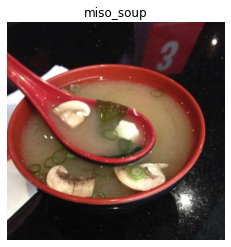

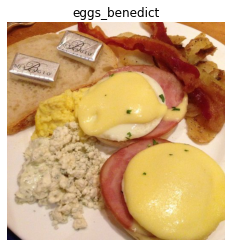

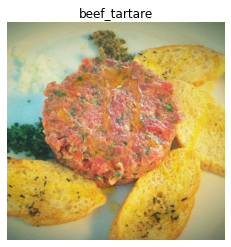

In [8]:
secure_random = random.SystemRandom()
plt.figure(figsize=(10,30))
for i in range(3):
    choice = secure_random.choice(['beef_tartare', 'eggs_benedict', 'miso_soup'])
    plt.subplots()
    plt.grid('off')
    plt.imshow(view_random_image(target_dir="data/train/", target_class=choice))

In [10]:
train_path = 'data/train'
test_path = 'data/train'
IMAGE_SIZE = (224, 224)
img_classes = os.listdir(train_path)
img_classes

['beef_tartare', 'eggs_benedict', 'miso_soup']

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

seed = 42

# Set the seed
np.random.seed(seed)
tf.random.set_seed(seed)

# Reading data:

In [14]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_data_augmented = train_datagen_augmented.flow_from_directory(test_path,
                                                                   target_size=IMAGE_SIZE,
                                                                   batch_size=32,
                                                                   class_mode='categorical')

test_data = test_datagen.flow_from_directory(train_path,
                                             target_size=IMAGE_SIZE,
                                             batch_size=32,
                                             class_mode='categorical')

Found 225 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [16]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


In [19]:
import tensorflow_hub as hub
import datetime

In [20]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

#### CNN - Adam optimizer:

In [21]:
tf.random.set_seed(seed)

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,
                          activation='softmax')
])

In [22]:
tf.random.set_seed(seed)

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data_augmented,
                            epochs=10,
                            steps_per_epoch=len(train_data_augmented),
                            validation_data=test_data,
                            validation_steps=len(test_data), 
                            callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="cnn_model")])

Saving TensorBoard log files to: tensorflow_hub/cnn_model/20211204-181047
Epoch 1/10
8/8 [==============================] - 10s 1s/step - loss: 1.1077 - accuracy: 0.3156 - val_loss: 1.0931 - val_accuracy: 0.3333
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 1.0705 - accuracy: 0.3733 - val_loss: 1.0267 - val_accuracy: 0.5022
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.9957 - accuracy: 0.5244 - val_loss: 0.9505 - val_accuracy: 0.5600
Epoch 4/10
8/8 [==============================] - 8s 989ms/step - loss: 1.1088 - accuracy: 0.4578 - val_loss: 0.9908 - val_accuracy: 0.5156
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.9954 - accuracy: 0.5022 - val_loss: 0.9451 - val_accuracy: 0.5156
Epoch 6/10
8/8 [==============================] - 8s 1s/step - loss: 0.9939 - accuracy: 0.4711 - val_loss: 0.8641 - val_accuracy: 0.5867
Epoch 7/10
8/8 [==============================] - 8s 1s/step - loss: 1.0174 - accuracy: 0.5244 - val

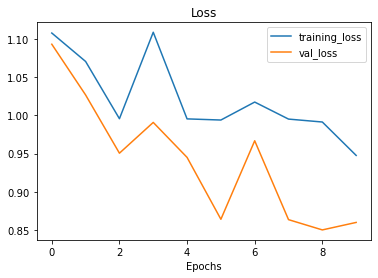

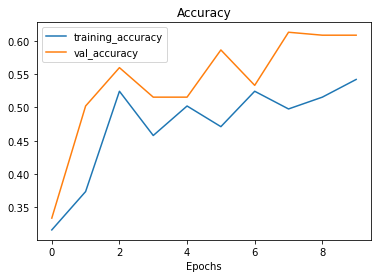

In [23]:
plot_loss_curves(cnn_history)

In [24]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

#### Resnet - Adam optimizer

In [25]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

In [26]:
def create_model(model_url, num_classes=10, input_shape=None):
    
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url,
                       trainable=False,
                       input_shape=input_shape),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model

In [27]:
resnet_model = create_model(resnet_url, num_classes=len(img_classes), input_shape=IMAGE_SIZE+(3,))

In [28]:
tf.random.set_seed(seed)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

resnet_history = resnet_model.fit(train_data_augmented,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="resnet_v2_50")])

Saving TensorBoard log files to: tensorflow_hub/resnet_v2_50/20211204-184611
Epoch 1/10
8/8 [==============================] - 18s 2s/step - loss: 0.9097 - accuracy: 0.5778 - val_loss: 0.5592 - val_accuracy: 0.7600
Epoch 2/10
8/8 [==============================] - 14s 2s/step - loss: 0.4986 - accuracy: 0.7822 - val_loss: 0.3248 - val_accuracy: 0.8800
Epoch 3/10
8/8 [==============================] - 15s 2s/step - loss: 0.3051 - accuracy: 0.8933 - val_loss: 0.2273 - val_accuracy: 0.9422
Epoch 4/10
8/8 [==============================] - 15s 2s/step - loss: 0.2599 - accuracy: 0.9111 - val_loss: 0.1794 - val_accuracy: 0.9556
Epoch 5/10
8/8 [==============================] - 14s 2s/step - loss: 0.2214 - accuracy: 0.9333 - val_loss: 0.1506 - val_accuracy: 0.9511
Epoch 6/10
8/8 [==============================] - 14s 2s/step - loss: 0.1595 - accuracy: 0.9733 - val_loss: 0.1251 - val_accuracy: 0.9644
Epoch 7/10
8/8 [==============================] - 14s 2s/step - loss: 0.1588 - accuracy: 0.9600

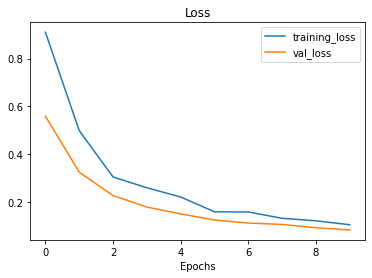

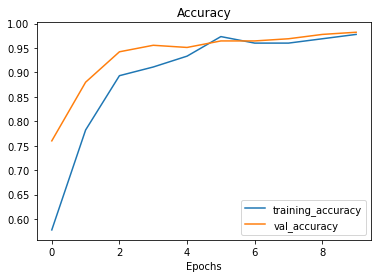

In [29]:
plot_loss_curves(resnet_history)

In [30]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 23,570,947
Trainable params: 6,147
Non-trainable params: 23,564,800
_________________________________________________________________


#### EfficientNet - Adam optimizer

In [31]:
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [32]:
efficientnet_model = create_model(efficientnet_url, num_classes=len(img_classes), input_shape=IMAGE_SIZE+(3,))

In [33]:
tf.random.set_seed(seed)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

efficientnet_history = efficientnet_model.fit(train_data_augmented,
                                              epochs=10,
                                              steps_per_epoch=len(train_data_augmented),
                                              validation_data=test_data,
                                              validation_steps=len(test_data), 
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     experiment_name="efficientnet")])

Saving TensorBoard log files to: tensorflow_hub/efficientnet/20211204-184850
Epoch 1/10
8/8 [==============================] - 18s 1s/step - loss: 0.8324 - accuracy: 0.6489 - val_loss: 0.5842 - val_accuracy: 0.9022
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.5408 - accuracy: 0.8933 - val_loss: 0.3865 - val_accuracy: 0.9467
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.3852 - accuracy: 0.9244 - val_loss: 0.2774 - val_accuracy: 0.9644
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.2912 - accuracy: 0.9689 - val_loss: 0.2128 - val_accuracy: 0.9822
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.2632 - accuracy: 0.9378 - val_loss: 0.1798 - val_accuracy: 0.9822
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.2188 - accuracy: 0.9600 - val_loss: 0.1574 - val_accuracy: 0.9956
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.1869 - accuracy: 0.9822

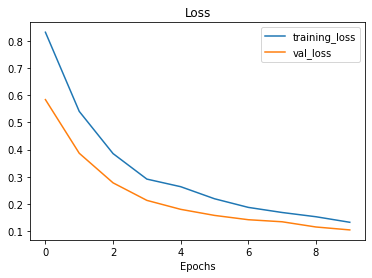

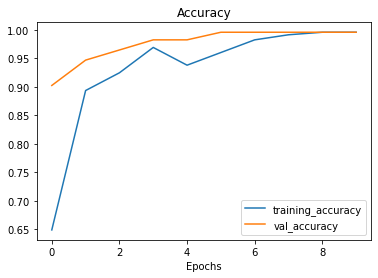

In [34]:
plot_loss_curves(efficientnet_history)

In [35]:
efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 dense_2 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 4,053,407
Trainable params: 3,843
Non-trainable params: 4,049,564
_________________________________________________________________


#### Resnet (optimizer SGD)


In [36]:
tf.random.set_seed(seed)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=['accuracy'])

resnet_sgd_history = resnet_model.fit(train_data_augmented,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="resnet_v2_50_sgd")])

Saving TensorBoard log files to: tensorflow_hub/resnet_v2_50_sgd/20211204-185048
Epoch 1/5
8/8 [==============================] - 17s 2s/step - loss: 0.0894 - accuracy: 0.9867 - val_loss: 0.0855 - val_accuracy: 0.9778
Epoch 2/5
8/8 [==============================] - 15s 2s/step - loss: 0.0857 - accuracy: 0.9822 - val_loss: 0.0756 - val_accuracy: 0.9867
Epoch 3/5
8/8 [==============================] - 15s 2s/step - loss: 0.0978 - accuracy: 0.9778 - val_loss: 0.0732 - val_accuracy: 0.9867
Epoch 4/5
8/8 [==============================] - 15s 2s/step - loss: 0.0825 - accuracy: 0.9778 - val_loss: 0.0652 - val_accuracy: 0.9822
Epoch 5/5
8/8 [==============================] - 15s 2s/step - loss: 0.0805 - accuracy: 0.9867 - val_loss: 0.0708 - val_accuracy: 0.9867


### EfficientNet - SGD optimizer

In [37]:
tf.random.set_seed(seed)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.SGD(),
                           metrics=['accuracy'])

efficientnet_sgd_history = efficientnet_model.fit(train_data_augmented,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_augmented),
                                              validation_data=test_data,
                                              validation_steps=len(test_data), 
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     experiment_name="efficientnet_sgd")])

Saving TensorBoard log files to: tensorflow_hub/efficientnet_sgd/20211204-185205
Epoch 1/5
8/8 [==============================] - 15s 2s/step - loss: 0.1213 - accuracy: 0.9867 - val_loss: 0.1031 - val_accuracy: 0.9956
Epoch 2/5
8/8 [==============================] - 11s 1s/step - loss: 0.1212 - accuracy: 0.9822 - val_loss: 0.0974 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 11s 1s/step - loss: 0.1236 - accuracy: 0.9911 - val_loss: 0.0979 - val_accuracy: 0.9956
Epoch 4/5
8/8 [==============================] - 11s 1s/step - loss: 0.1106 - accuracy: 0.9956 - val_loss: 0.0962 - val_accuracy: 0.9956
Epoch 5/5
8/8 [==============================] - 11s 1s/step - loss: 0.1148 - accuracy: 0.9911 - val_loss: 0.0942 - val_accuracy: 0.9956


In [38]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs
# rm -rf ./tensorflow_hub/

In [67]:
# %tensorboard --logdir ./tensorflow_hub/
%tensorboard --logdir=./tensorflow_hub/ --host localhost --port 8088

Reusing TensorBoard on port 8088 (pid 13244), started 2:04:21 ago. (Use '!kill 13244' to kill it.)

In [40]:
from IPython.display import SVG

In [41]:
svg_image_dir = './graphs'

In [42]:
svg_plots = ['epoch_accuracy.svg', 'epoch_loss.svg', 'evaluation_loss_vs_iterations.svg', 'evaluation_accuracy_vs_iterations.svg']

### Plots:
##### Epoch accuracy

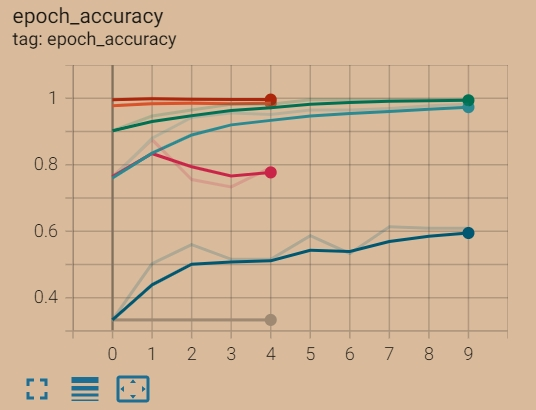

In [63]:
from IPython.display import Image
Image(filename=os.path.join(svg_image_dir, 'epoch_accuracy.jpg'), width=500, height=500)

### Epoch loss

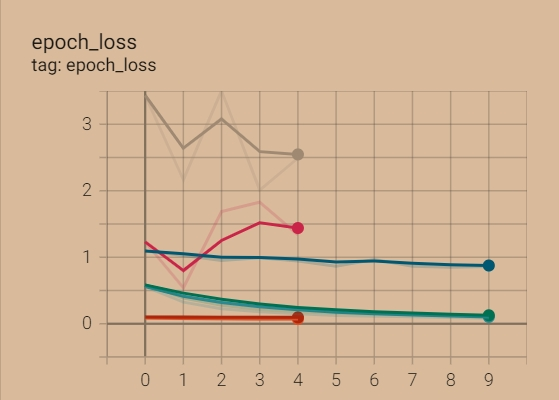

In [64]:
Image(filename=os.path.join(svg_image_dir, 'epoch_loss.jpg'), width=500, height=500)

#### Evaluation loss | iterations

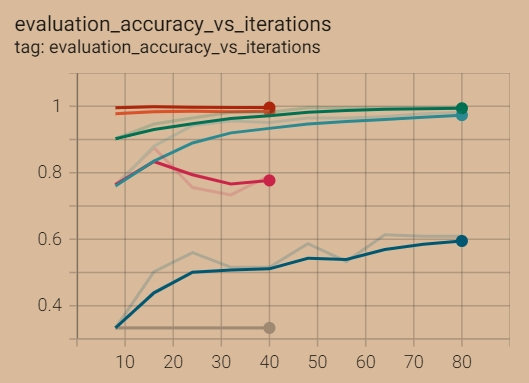

In [65]:
Image(filename=os.path.join(svg_image_dir, 'epoch_loss_iter.jpg'), width=500, height=500)

#### Evaluation accuracy | iterations

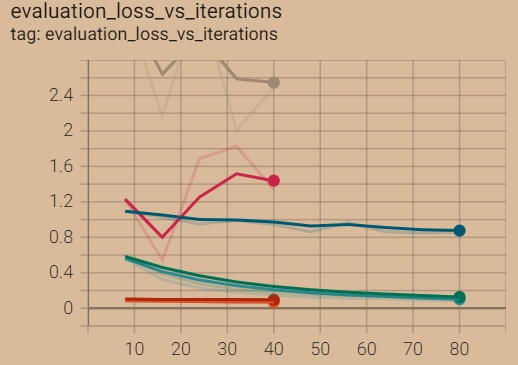

In [66]:
Image(filename=os.path.join(svg_image_dir, 'epoch_accuracy_iter.jpg'), width=500, height=500)

In [44]:
def model_trainable_layers(model):
    for layer_number, layer in enumerate(model.layers):
        print(layer_number, layer.name, layer.trainable, len(layer.trainable_variables))

#### Fine-tuning:
#### Resnet + fine-tuning

In [45]:
resnet_tune = tf.keras.applications.ResNet50V2(include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3),
        pooling='max',
        classes=3,
        classifier_activation='softmax')

94683136/94668760 [==============================] - 8s 0us/step


In [46]:
# Fine-tuning last 10 layers
resnet_tune.trainable = False

for layer in resnet_tune.layers[-10:]:
    layer.trainable = True

In [47]:
model_trainable_layers(resnet_tune)[-10]

0 input_1 False 0
1 conv1_pad False 0
2 conv1_conv False 0
3 pool1_pad False 0
4 pool1_pool False 0
5 conv2_block1_preact_bn False 0
6 conv2_block1_preact_relu False 0
7 conv2_block1_1_conv False 0
8 conv2_block1_1_bn False 0
9 conv2_block1_1_relu False 0
10 conv2_block1_2_pad False 0
11 conv2_block1_2_conv False 0
12 conv2_block1_2_bn False 0
13 conv2_block1_2_relu False 0
14 conv2_block1_0_conv False 0
15 conv2_block1_3_conv False 0
16 conv2_block1_out False 0
17 conv2_block2_preact_bn False 0
18 conv2_block2_preact_relu False 0
19 conv2_block2_1_conv False 0
20 conv2_block2_1_bn False 0
21 conv2_block2_1_relu False 0
22 conv2_block2_2_pad False 0
23 conv2_block2_2_conv False 0
24 conv2_block2_2_bn False 0
25 conv2_block2_2_relu False 0
26 conv2_block2_3_conv False 0
27 conv2_block2_out False 0
28 conv2_block3_preact_bn False 0
29 conv2_block3_preact_relu False 0
30 conv2_block3_1_conv False 0
31 conv2_block3_1_bn False 0
32 conv2_block3_1_relu False 0
33 conv2_block3_2_pad False 0
3

TypeError: 'NoneType' object is not subscriptable

In [48]:
resnet_fine_tuning_model = tf.keras.Sequential([
        resnet_tune,
        tf.keras.layers.Dense(3, activation='softmax')
    ])

In [49]:
tf.random.set_seed(seed)

# Compile
resnet_fine_tuning_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

resnet_fine_tuning_model_history = resnet_fine_tuning_model.fit(train_data_augmented,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="resnet_v2_50_fine_tuning")])

Saving TensorBoard log files to: tensorflow_hub/resnet_v2_50_fine_tuning/20211204-185454


C:\Users\u1-510\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5
8/8 [==============================] - 18s 2s/step - loss: 2.8699 - accuracy: 0.5556 - val_loss: 1.2311 - val_accuracy: 0.7644
Epoch 2/5
8/8 [==============================] - 16s 2s/step - loss: 2.3486 - accuracy: 0.6933 - val_loss: 0.5419 - val_accuracy: 0.8756
Epoch 3/5
8/8 [==============================] - 16s 2s/step - loss: 2.7319 - accuracy: 0.6578 - val_loss: 1.6870 - val_accuracy: 0.7556
Epoch 4/5
8/8 [==============================] - 16s 2s/step - loss: 2.2191 - accuracy: 0.7200 - val_loss: 1.8278 - val_accuracy: 0.7333
Epoch 5/5
8/8 [==============================] - 15s 2s/step - loss: 2.4774 - accuracy: 0.6933 - val_loss: 1.3376 - val_accuracy: 0.7911


### EfficientNet + Fine-tuning

In [50]:
efficientnet_tune = tf.keras.applications.EfficientNetB0(include_top=False,
          weights='imagenet',
          input_shape=IMAGE_SIZE + (3,),
          pooling='max',
          classes=len(img_classes),
          classifier_activation='softmax')

16719872/16705208 [==============================] - 1s 0us/step


In [51]:
# Fine-tuning last 10 layers
efficientnet_tune.trainable = False

for layer in efficientnet_tune.layers[-10:]:
    layer.trainable = True

In [52]:
model_trainable_layers(efficientnet_tune)

0 input_2 False 0
1 rescaling False 0
2 normalization False 0
3 stem_conv_pad False 0
4 stem_conv False 0
5 stem_bn False 0
6 stem_activation False 0
7 block1a_dwconv False 0
8 block1a_bn False 0
9 block1a_activation False 0
10 block1a_se_squeeze False 0
11 block1a_se_reshape False 0
12 block1a_se_reduce False 0
13 block1a_se_expand False 0
14 block1a_se_excite False 0
15 block1a_project_conv False 0
16 block1a_project_bn False 0
17 block2a_expand_conv False 0
18 block2a_expand_bn False 0
19 block2a_expand_activation False 0
20 block2a_dwconv_pad False 0
21 block2a_dwconv False 0
22 block2a_bn False 0
23 block2a_activation False 0
24 block2a_se_squeeze False 0
25 block2a_se_reshape False 0
26 block2a_se_reduce False 0
27 block2a_se_expand False 0
28 block2a_se_excite False 0
29 block2a_project_conv False 0
30 block2a_project_bn False 0
31 block2b_expand_conv False 0
32 block2b_expand_bn False 0
33 block2b_expand_activation False 0
34 block2b_dwconv False 0
35 block2b_bn False 0
36 bloc

In [53]:
efficientnet_fine_tuning_model = tf.keras.Sequential([
        efficientnet_tune,
        tf.keras.layers.Dense(3, activation='softmax')
    ])

In [54]:
tf.random.set_seed(seed)

# Compile
efficientnet_fine_tuning_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

efficientnet_fine_tuning_model_history = efficientnet_fine_tuning_model.fit(train_data_augmented,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="efficientnet_fine_tuning_model")])

Saving TensorBoard log files to: tensorflow_hub/efficientnet_fine_tuning_model/20211204-185619
Epoch 1/5
8/8 [==============================] - 17s 2s/step - loss: 6.2594 - accuracy: 0.3422 - val_loss: 3.4352 - val_accuracy: 0.3333
Epoch 2/5
8/8 [==============================] - 12s 2s/step - loss: 4.0089 - accuracy: 0.3556 - val_loss: 2.1648 - val_accuracy: 0.3333
Epoch 3/5
8/8 [==============================] - 11s 2s/step - loss: 3.4812 - accuracy: 0.3467 - val_loss: 3.5027 - val_accuracy: 0.3333
Epoch 4/5
8/8 [==============================] - 12s 2s/step - loss: 2.9201 - accuracy: 0.3022 - val_loss: 2.0089 - val_accuracy: 0.3333
Epoch 5/5
8/8 [==============================] - 12s 2s/step - loss: 1.9797 - accuracy: 0.3067 - val_loss: 2.4917 - val_accuracy: 0.3333
